In [63]:
import math
import dimod
import dwave_networkx as dnx
import dwave.inspector
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#from sympy import *
import minorminer
import networkx as nx
import numpy as np
from dwave.samplers import SimulatedAnnealingSampler
from dwave.system import EmbeddingComposite
import re

In [ ]:
# I did not have time to put together many visuals for
#    this data but I left the Regex to make it easier to
#    access the data as usable, graphable arrays

In [64]:
fd = open('0_60brknComp_dataFaults_bz15.txt')

timesMM0  = re.findall('^BrknComp.*Agnostic.*Times: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
timesLAMG0  = re.findall('^BrknComp.*LA Mig.*Times: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
timesLANO0  = re.findall('^BrknComp.*LA NO Mig.*Times: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

qubitsMM0 = re.findall('^BrknComp.*Agnostic.*Sum: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
qubitsLAMG0 = re.findall('^BrknComp.*LA Mig.*Sum: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
qubitsLANO0 = re.findall('^BrknComp.*LA NO Mig.*Sum: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

maxchainMM0 = re.findall('^BrknComp.*Agnostic.*Max: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
maxchainLAMG0 = re.findall('^BrknComp.*LA Mig.*Max: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
maxchainLANO0 = re.findall('^BrknComp.*LA NO Mig.*Max: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

failsMM0  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG0  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO0  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [65]:
for x in timesMM0:
    timeMM0 = x.split(',')
timesMM0 = map(float, map(str.strip, timeMM0))

for x in timesLAMG0:
    timeLAMG0 = x.split(',')
timesLAMG0 = map(float, map(str.strip, timeLAMG0))

for x in timesLANO0:
    timeLANO0 = x.split(',')
timesLANO0 = map(float, map(str.strip, timeLANO0))


In [66]:
for x in qubitsMM0:
    qubitMM0 = x.split(',')
qubitsMM0 = map(float, map(str.strip, qubitMM0))

for x in qubitsLAMG0:
    qubitLAMG0 = x.split(',')
qubitsLAMG0 = map(float, map(str.strip, qubitLAMG0))

for x in qubitsLANO0:
    qubitLANO0 = x.split(',')
qubitsLANO0 = map(float, map(str.strip, qubitLANO0))


In [67]:
for x in maxchainMM0:
    chainMM0 = x.split(',')
maxchainMM0 = map(float, map(str.strip, chainMM0))

for x in maxchainLAMG0:
    chainLAMG0 = x.split(',')
maxchainLAMG0 = map(float, map(str.strip, chainLAMG0))

for x in maxchainLANO0:
    chainLANO0 = x.split(',')
maxchainLANO0 = map(float, map(str.strip, chainLANO0))


In [68]:
for x in failsMM0:
    failMM0 = x.split(',')
failsMM0 = map(float, map(str.strip, failMM0))

for x in failsLAMG0:
    failLAMG0 = x.split(',')
failsLAMG0 = map(float, map(str.strip, failLAMG0))

for x in failsLANO0:
    failLANO0 = x.split(',')
failsLANO0 = map(float, map(str.strip, failLANO0))


In [69]:
fd = open('744_60brknComp_dataFaults_bz15.txt')

failsMM744  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG744  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO744  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [70]:
fd = open('1488_60brknComp_dataFaults_bz15.txt')

failsMM1488  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG1488  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO1488  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [71]:
fd = open('1860_60brknComp_dataFaults_bz15.txt')

failsMM1860  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG1860  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO1860  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [72]:
fd = open('2232_60brknComp_dataFaults_bz15.txt')

failsMM2232  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG2232  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO2232  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [73]:
fd = open('2976_60brknComp_dataFaults_bz15.txt')

failsMM2976  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG2976  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO2976  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [74]:
fd = open('3720_60brknComp_dataFaults_bz15.txt')

failsMM3720  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG3720  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO3720  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [75]:
for x in failsMM744:
    failMM744 = x.split(',')
failsMM744 = map(float, map(str.strip, failMM744))
for x in failsLAMG744:
    failLAMG744 = x.split(',')
failsLAMG744 = map(float, map(str.strip, failLAMG744))
for x in failsLANO744:
    failLANO744 = x.split(',')
failsLANO744 = map(float, map(str.strip, failLANO744))
######
for x in failsMM1488:
    failMM1488 = x.split(',')
failsMM1488 = map(float, map(str.strip, failMM1488))
for x in failsLAMG1488:
    failLAMG1488 = x.split(',')
failsLAMG1488 = map(float, map(str.strip, failLAMG1488))
for x in failsLANO1488:
    failLANO1488 = x.split(',')
failsLANO1488 = map(float, map(str.strip, failLANO1488))
######
for x in failsMM1860:
    failMM1860 = x.split(',')
failsMM1860 = map(float, map(str.strip, failMM1860))
for x in failsLAMG1860:
    failLAMG1860 = x.split(',')
failsLAMG1860 = map(float, map(str.strip, failLAMG1860))
for x in failsLANO1860:
    failLANO1860 = x.split(',')
failsLANO1860 = map(float, map(str.strip, failLANO1860))
######
for x in failsMM2232:
    failMM2232 = x.split(',')
failsMM2232 = map(float, map(str.strip, failMM2232))
for x in failsLAMG2232:
    failLAMG2232 = x.split(',')
failsLAMG2232 = map(float, map(str.strip, failLAMG2232))
for x in failsLANO2232:
    failLANO2232 = x.split(',')
failsLANO2232 = map(float, map(str.strip, failLANO2232))
######
for x in failsMM2976:
    failMM2976 = x.split(',')
failsMM2976 = map(float, map(str.strip, failMM2976))
for x in failsLAMG2976:
    failLAMG2976 = x.split(',')
failsLAMG2976 = map(float, map(str.strip, failLAMG2976))
for x in failsLANO2976:
    failLANO2976 = x.split(',')
failsLANO2976 = map(float, map(str.strip, failLANO2976))
######
for x in failsMM3720:
    failMM3720 = x.split(',')
failsMM3720 = map(float, map(str.strip, failMM3720))
for x in failsLAMG3720:
    failLAMG3720 = x.split(',')
failsLAMG3720 = map(float, map(str.strip, failLAMG3720))
for x in failsLANO3720:
    failLANO3720 = x.split(',')
failsLANO3720 = map(float, map(str.strip, failLANO3720))


In [60]:
x_fault_axis = [0.0,0.1,0.2,0.25,0.3,0.4,0.5]
node_yield = [1.0,0.9,0.8,0.75,0.6,0.5]

In [77]:
*failsMM0, = failsMM0
*failsLAMG0, = failsLAMG0
*failsLANO0, = failsLANO0

*failsMM744, = failsMM744
*failsLAMG744, = failsLAMG744
*failsLANO744, = failsLANO744

*failsMM1488, = failsMM1488
*failsLAMG1488, = failsLAMG1488
*failsLANO1488, = failsLANO1488

*failsMM1860, = failsMM1860
*failsLAMG1860, = failsLAMG1860
*failsLANO1860, = failsLANO1860

*failsMM2232, = failsMM2232
*failsLAMG2232, = failsLAMG2232
*failsLANO2232, = failsLANO2232

*failsMM2976, = failsMM2976
*failsLAMG2976, = failsLAMG2976
*failsLANO2976, = failsLANO2976

*failsMM3720, = failsMM3720
*failsLAMG3720, = failsLAMG3720
*failsLANO3720, = failsLANO3720

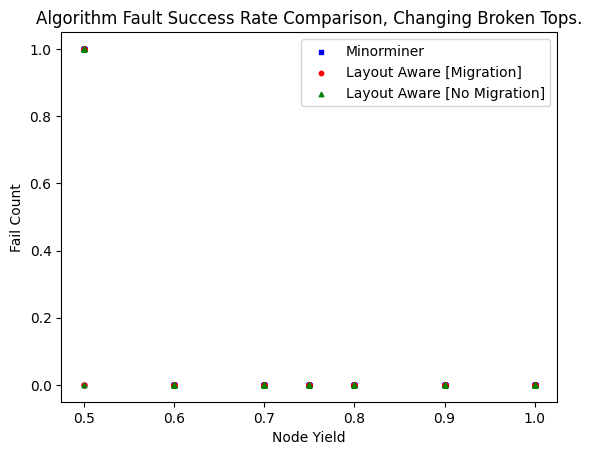

In [79]:
plt.clf()
# ten runs per algorithm, chaning topology each alg.
plt.scatter([1.0]*len(failsMM0), failsMM0,s=10, c='b', marker="s", label='0.0')
plt.scatter([1.0]*len(failsLAMG0), failsLAMG0,s=10, c='r', marker="o", label='0.0')
plt.scatter([1.0]*len(failsLANO0), failsLANO0,s=10, c='g', marker="^", label='0.0')

plt.scatter([0.9]*len(failsMM744), failsMM744,s=10, c='b', marker="s", label='0.1')
plt.scatter([0.9]*len(failsLAMG744), failsLAMG744,s=10, c='r', marker="o", label='0.1')
plt.scatter([0.9]*len(failsLANO744), failsLANO744,s=10, c='g', marker="^", label='0.1')

plt.scatter([0.8]*len(failsMM1488), failsMM1488,s=10, c='b', marker="s", label='0.2')
plt.scatter([0.8]*len(failsLAMG1488), failsLAMG1488,s=10, c='r', marker="o", label='0.2')
plt.scatter([0.8]*len(failsLANO1488), failsLANO1488,s=10, c='g', marker="^", label='0.2')

plt.scatter([0.75]*len(failsMM1860), failsMM1860,s=10, c='b', marker="s", label='0.25')
plt.scatter([0.75]*len(failsLAMG1860), failsLAMG1860,s=10, c='r', marker="o", label='0.25')
plt.scatter([0.75]*len(failsLANO1860), failsLANO1860,s=10, c='g', marker="^", label='0.25')

plt.scatter([0.7]*len(failsMM2232), failsMM2232,s=10, c='b', marker="s", label='0.3')
plt.scatter([0.7]*len(failsLAMG2232), failsLAMG2232,s=10, c='r', marker="o", label='0.3')
plt.scatter([0.7]*len(failsLANO2232), failsLANO2232,s=10, c='g', marker="^", label='0.3')

plt.scatter([0.6]*len(failsMM2976), failsMM2976,s=10, c='b', marker="s", label='0.4')
plt.scatter([0.6]*len(failsLAMG2976), failsLAMG2976,s=10, c='r', marker="o", label='0.4')
plt.scatter([0.6]*len(failsLANO2976), failsLANO2976,s=10, c='g', marker="^", label='0.4')

plt.scatter([0.5]*len(failsMM3720), failsMM3720,s=10, c='b', marker="s", label='0.5')
plt.scatter([0.5]*len(failsLAMG3720), failsLAMG3720,s=10, c='r', marker="o", label='0.5')
plt.scatter([0.5]*len(failsLANO3720), failsLANO3720,s=10, c='g', marker="^", label='0.5')

plt.legend(["Minorminer", "Layout Aware [Migration]", "Layout Aware [No Migration]"])
plt.xlabel("Node Yield")
plt.ylabel("Fail Count")
plt.title("Algorithm Fault Success Rate Comparison, Changing Broken Tops.")
plt.show()
#plt.savefig("images/total_comp_agnmm_time.png")

In [80]:
ftmm0 = sum(failsMM0)
ftlm0 = sum(failsLAMG0)
ftln0 = sum(failsLANO0)

ftmm744 = sum(failsMM744)
ftlm744 = sum(failsLAMG744)
ftln744 = sum(failsLANO744)

ftmm1488 = sum(failsMM1488)
ftlm1488 = sum(failsLAMG1488)
ftln1488 = sum(failsLANO1488)

ftmm1860 = sum(failsMM1860)
ftlm1860 = sum(failsLAMG1860)
ftln1860 = sum(failsLANO1860)

ftmm2232 = sum(failsMM2232)
ftlm2232 = sum(failsLAMG2232)
ftln2232 = sum(failsLANO2232)

ftmm2976 = sum(failsMM2976)
ftlm2976 = sum(failsLAMG2976)
ftln2976 = sum(failsLANO2976)

ftmm3720 = sum(failsMM3720)
ftlm3720 = sum(failsLAMG3720)
ftln3720 = sum(failsLANO3720)

mm_arr = [ftmm0, ftmm1488, ftmm1860, ftmm2232, ftmm2976, ftmm3720]
lm_arr = [ftlm0, ftlm1488, ftlm1860, ftlm2232, ftlm2976, ftlm3720]
ln_arr = [ftln0, ftln1488, ftln1860, ftln2232, ftln2976, ftln3720]

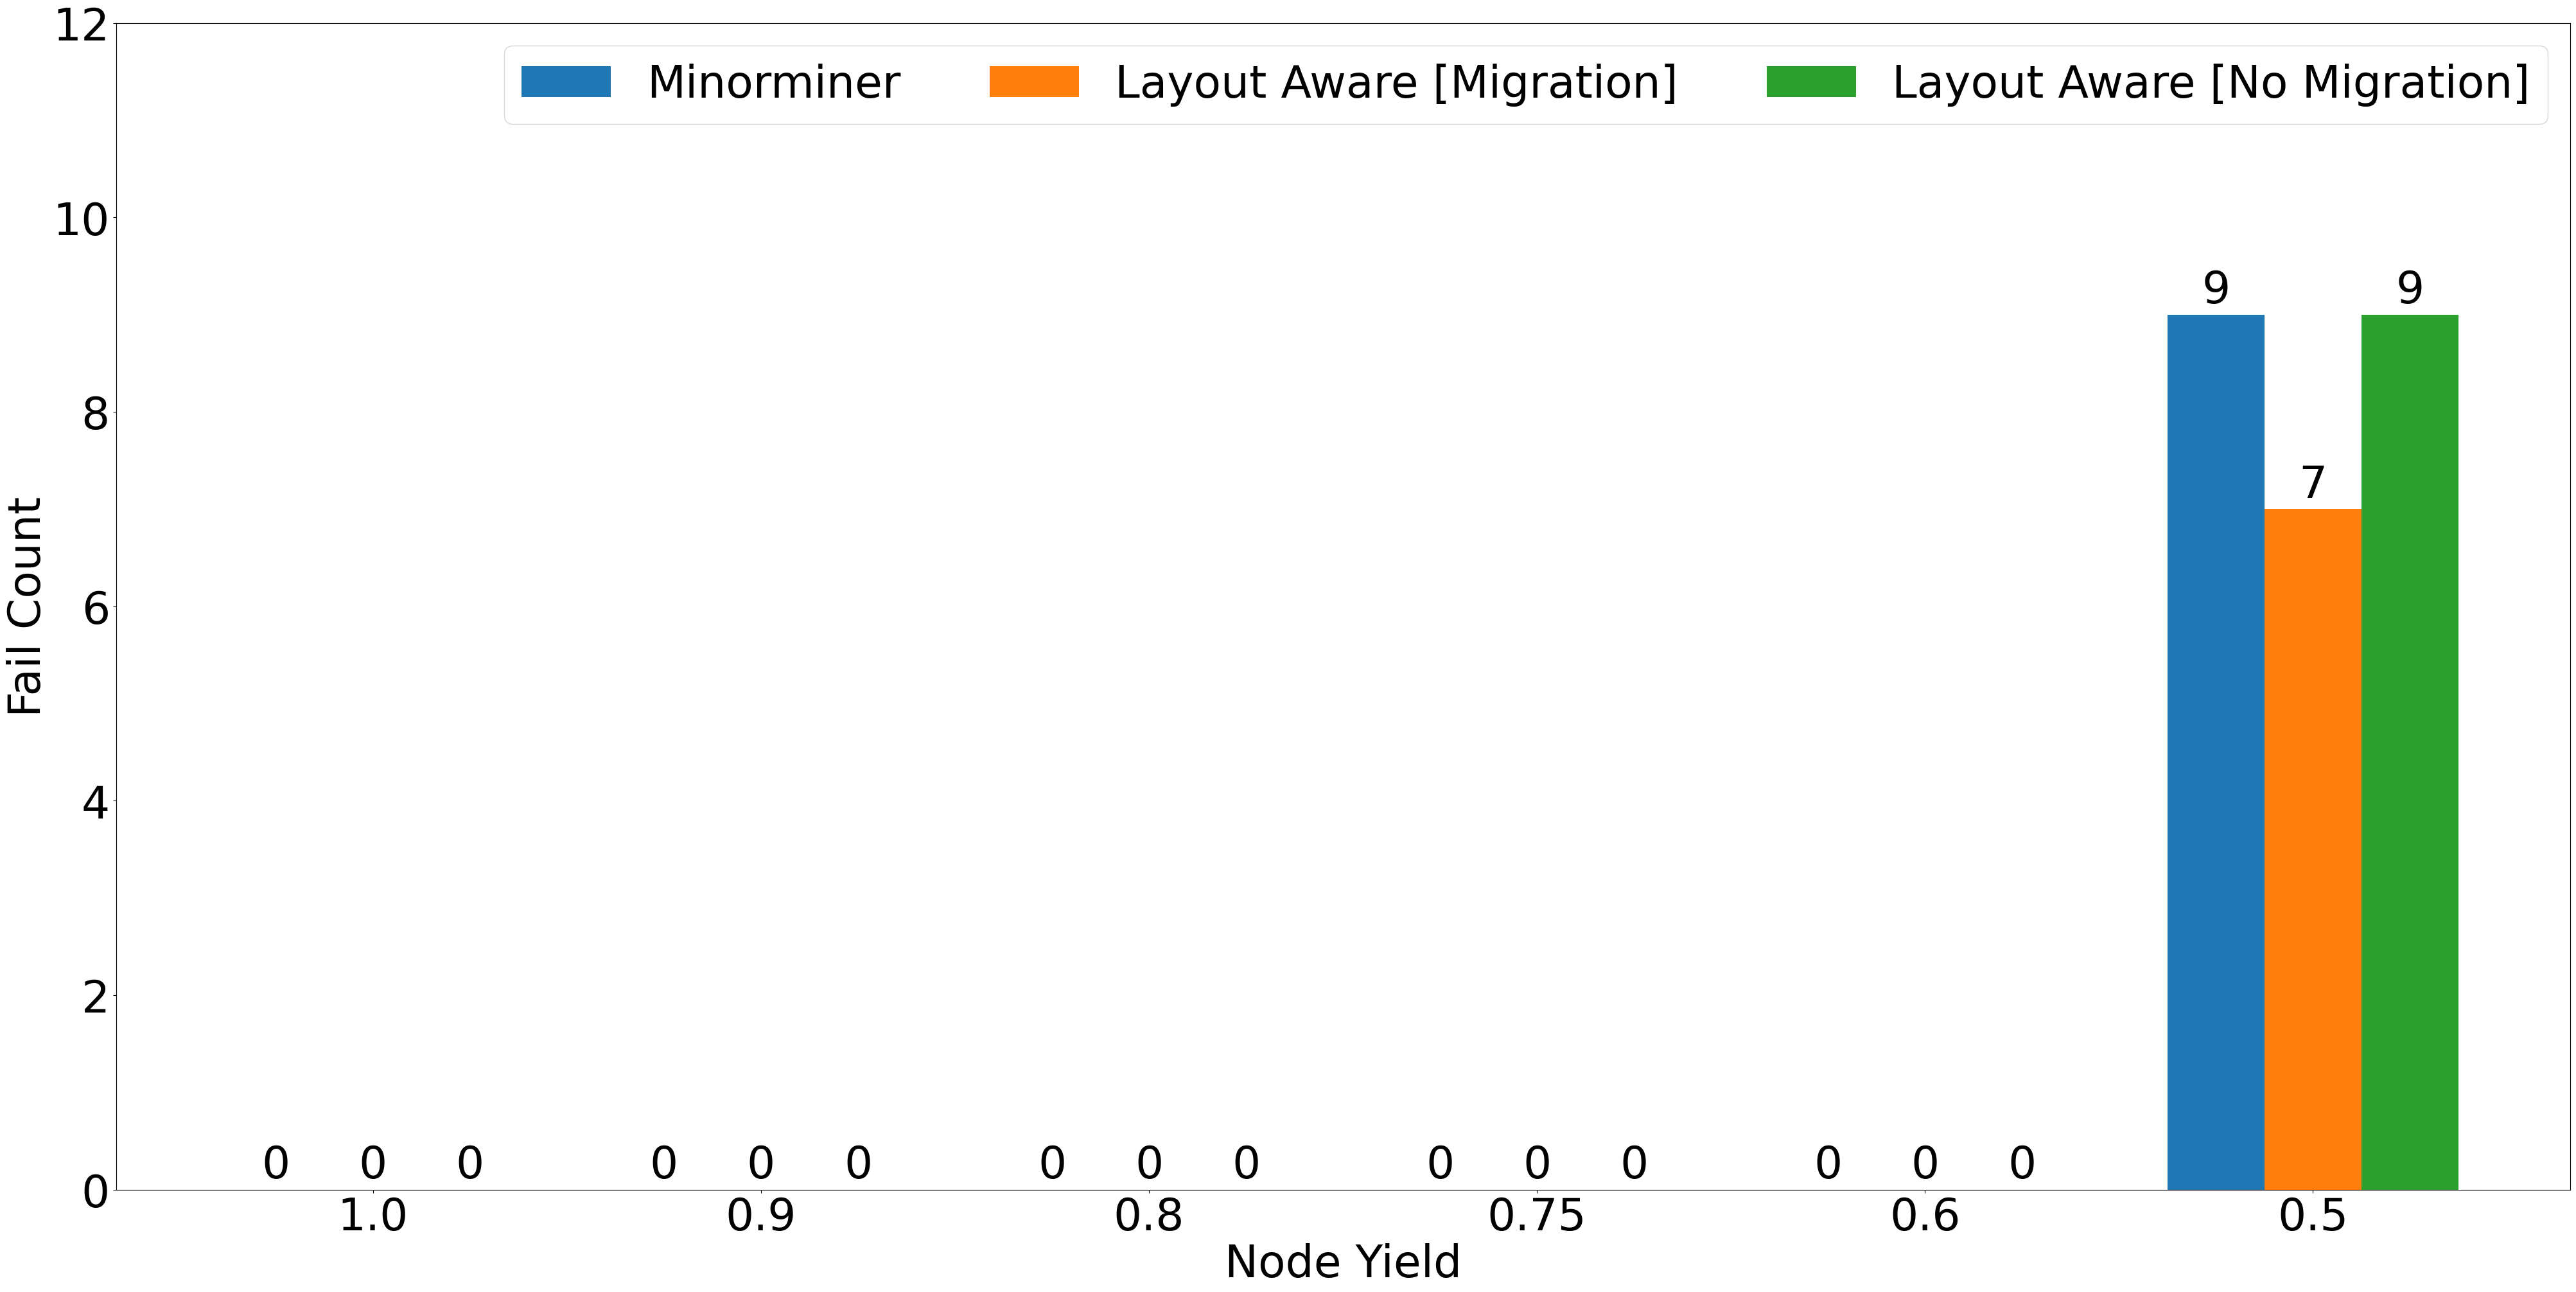

In [87]:
SMALL_SIZE=50
plt.rc('font', size=SMALL_SIZE)

node_yield = [1.0,0.9,0.8,0.75,0.6,0.5]
penguin_means = {
    'Minorminer': mm_arr,
    'Layout Aware [Migration]': lm_arr,
    'Layout Aware [No Migration]': ln_arr,
}
#'Busclique': fail_arr2bc[55:],
x = np.arange(len(node_yield))  #the label locations
width = 0.25  #the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

#Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fail Count')
ax.set_xlabel('Node Yield')
ax.set_xticks(x + width, node_yield)
ax.legend(ncols=3)
ax.set_ylim(0, 12)

ax.figure.set_figwidth(40)
ax.figure.set_figheight(20)
plt.show()

#plt.savefig('images/total_brknZephComp_fail2.png')

In [ ]:
##################################################
##################################################
##################################################
##################################################

In [ ]:
fd = open('0_62brknComp_dataFaults_bz15.txt')

failsMM0  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG0  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO0  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [69]:
fd = open('744_60brknComp_dataFaults_bz15.txt')

failsMM744  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG744  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO744  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [70]:
fd = open('1488_60brknComp_dataFaults_bz15.txt')

failsMM1488  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG1488  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO1488  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [71]:
fd = open('1860_60brknComp_dataFaults_bz15.txt')

failsMM1860  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG1860  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO1860  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [72]:
fd = open('2232_60brknComp_dataFaults_bz15.txt')

failsMM2232  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG2232  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO2232  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [73]:
fd = open('2976_60brknComp_dataFaults_bz15.txt')

failsMM2976  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG2976  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO2976  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()

In [74]:
fd = open('3720_60brknComp_dataFaults_bz15.txt')

failsMM3720  = re.findall('^BrknComp.*Agnostic.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLAMG3720  = re.findall('^BrknComp.*LA Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)
failsLANO3720  = re.findall('^BrknComp.*LA NO Mig.*Fails: \[(.*)\]',fd.read(), re.MULTILINE)
fd.seek(0)

fd.close()